## 1. Encàrrec de productora
<p><img src="https://cdn.pixabay.com/photo/2018/10/09/00/21/netflix-3733812_960_720.jpg" alt="foto pelicula"></p>
<p>Una de les productores més importants del mercat ens ha demant fer un anàlisis històric abans d'invertir en una nova pel·lìcula.</p>
<p>Haurem de donar repsposta a diferents preguntes com: </p>

*   La popularitat de les pel·lícules han disminuït durant els anys
*   Quins gènere tenen millor valoracions
*   Les pel·lícules que ofereixen un millor benefici proporcional son les de més pressupost
*   Quins gèneres ofereixen més benefici.
*   Proposa una idea de pel·lìcula
*   Surt a compte fer una segona part?

<p>Per realitzar aquest anàlisis disposem dels següents set de dades:.</p>

*  movies.p: pel·lìcula data i espectadors
*   movie_to_genres.p: gènere de cada pel·lìcula
*   financial.p: dades econòmiques de cada pel·lìcula
*   sequels.p: relació de les pelìcules i les seves sequeles.
*   ratings.p: valoració de les pel·lìcules




In [1]:
import pandas as pd

#importem dataset i en visualitzem el contigut

movies = pd.read_pickle('movies.p')
movies.head()


,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17


In [2]:
movieGen = pd.read_pickle('movie_to_genres.p')
movieGen.head()

,movie_id,genre
0,5,Crime
1,5,Comedy
2,11,Science Fiction
3,11,Action
4,11,Adventure


In [3]:
financial = pd.read_pickle('financials.p')
financial.head()

,id,budget,revenue
0,19995,237000000,2.787965e+09
1,285,300000000,9.610000e+08
2,206647,245000000,8.806746e+08
3,49026,250000000,1.084939e+09
4,49529,260000000,2.841391e+08


In [4]:
sequels = pd.read_pickle('sequels.p')
sequels.head()

,id,title,sequel
0,19995,Avatar,<NA>
1,862,Toy Story,863
2,863,Toy Story 2,10193
3,597,Titanic,<NA>
4,24428,The Avengers,<NA>


In [5]:
ratings = pd.read_pickle('ratings.p')
ratings.head()

,id,vote_average,vote_count
0,19995,7.2,11800.0
1,285,6.9,4500.0
2,206647,6.3,4466.0
3,49026,7.6,9106.0
4,49529,6.1,2124.0


In [6]:
actors = pd.read_csv('actors_movies.csv')
actors.head()

,Actor,Title
0,"[Emil Eifrem,Hugo Weaving,Laurence Fishburne,C...",The Matrix
1,"[Hugo Weaving,Laurence Fishburne,Carrie-Anne M...",The Matrix Reloaded
2,"[Hugo Weaving,Laurence Fishburne,Carrie-Anne M...",The Matrix Revolutions
3,"[Al Pacino,Charlize Theron,Keanu Reeves]",The Devil's Advocate
4,"[James Marshall,Kevin Pollak,J.T. Walsh,Aaron ...",A Few Good Men




---



## Anàlisis de la popularitat

L'empresa creu que durant els darrers anys les pel·lícules tenen menys popularitat. Vol que ho comprovem gràficament

Primer de tot importarem el nostre dataset i analitzarem les seves dades bàsiques ¿Quina es la popularitat mitja i la més alta?

In [7]:
#Analitzem el dataset movies, el tipus de les seves variables, el seu tamany i els seus estadístics bàsics
moviesMedia = movies['popularity']
print(movies.dtypes)
print(moviesMedia.median())
print(moviesMedia.max())

id                int64
title            object
popularity      float64
release_date     object
dtype: object
12.921594
875.581305


Necessitem treballar amb el camp release_date com a datatime, així que transformem la columna i ho comprovem. ¿De quin fins a quin any tenim dades?

In [8]:
#Necessitem treballar amb el camp release_date com a datatime, així que creem la columna year i ho comprovem
pulls = pd.concat([movies])
pulls.shape
pulls['release_date'] = pd.to_datetime(pulls['release_date'], utc = True)

movies['year'] = pulls['release_date'].dt.year
movies.head()
# Observem max i min
print(movies['year'].max())
print(movies['year'].min())

2017.0
1916.0


L'empresa considera que els gustos han canviat molt durant els últims anys, aixi que nomès l'interessen les dades desde el 2010. ¿De cuàntes dades disposem? ¿De cuàntes dades disposem?

In [9]:
#Filtrem el nostre dataset
dateYear = movies.query('year >= 2010')

dateYear.shape

(1446, 5)

Pasem a mostrar la linea temporal de com ha variat la popularitat durant els darrers anys. 

<AxesSubplot:title={'center':'popularidad x año'}, xlabel='year'>

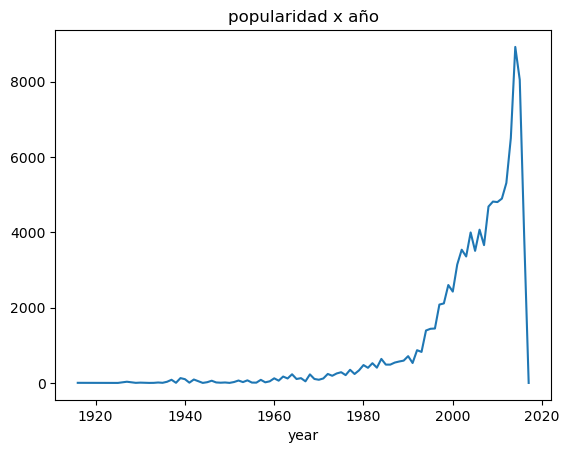

In [10]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

#Agrupem per any i obtenim la suma de la popularitat
dataYearPolulari = movies.groupby(['year'])['popularity'].sum()

#mostre la variació temporal
dataYearPolulari. plot(kind='line',x='year', y= 'popularity',title='popularidad x año')

¿Què passa al 2017, quin és el motiu? Igualment aquesta devadalla és molt extranya, és probalble a que en alguns anys s'hagin realitzat moltes més pel·lícules i que per aquesta raó la mitja sigui molt més alta. Anem a fer el mateix procediment amb la mitja

<AxesSubplot:title={'center':'media d popularidad x año de peliculas'}, xlabel='year'>

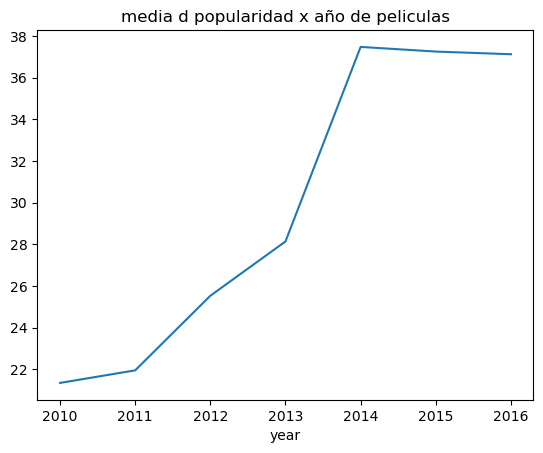

In [11]:
# Agrupem i obtenir la mitja de la popularitat (no tenim en compte 2017)

groupMediaPopu = dateYear.query('year < 2017')
groupMediaPopu = groupMediaPopu.groupby(['year'])['popularity'].mean()


#mostre la variació temporal
groupMediaPopu.plot(kind='line',x='year', y= 'popularity', title = 'media d popularidad x año de peliculas')


### Resposta 1. Estan perdent popularitat les pel·lìcules?

si, el 2017 les peliculas van perde popularitat respecte als any anteriors.



---



## Anàlisis del rating

Un cop decidit que val la pena realitzar una pel·lìcula, haurem de valorar de quina gènere val la pena en funció de la seva valoració. Primer de tot mostrarem la puntuació mitja de les pel·lícules i les 10 pel·lìcules més valorades. Mostra únicament el nom i el títol de la pel·lìcula ( i el index que surt per defecte)

In [12]:
#Haurem de fer una join entre els dos datasets implicats (recordar que nomès ens interesa pel·lìcules a partir del 2010)
dataMovieAndRatings = movies.merge(ratings, on = 'id')
# Nomès ens interessa les grans produccions, pel·lìcules amb més de 60k de popularitat i més de 2000 valoracions
dataYearPopuVote = dataMovieAndRatings.query('year >= 2010 and popularity > 60.000 and vote_count > 2000')
#Mostrem pel·lìcules
dataYearPopuVote.sort_values(by = 'vote_average', ascending = False)['title'][0:10]

3998                    Whiplash
3172                        Room
32                     Inception
4343                Interstellar
1440          The Imitation Game
353                   Inside Out
2952    The Grand Budapest Hotel
4717            12 Years a Slave
2423     Guardians of the Galaxy
4758                   Gone Girl
Name: title, dtype: object

De les pel·lìcules que ens interessa pel nostre anàlisis ( més de 60k de popularitat i més de 2000 valoracions) obtindrem el seu gènere per mostra gràficament la mitja per gènere.

In [13]:
#Mirem primer el tamany del nostre dataset filtrar
dataYearPopuVote.shape

#Realitzem la join
dataMoviesRatingGenre =  dataMovieAndRatings.merge(movieGen, left_on='id', right_on='movie_id')
analisis = dataMoviesRatingGenre.query('year >= 2010 and popularity > 60.000 and vote_count > 2000')
#Mirem el tamany del data set resultant

display(analisis)

,id,title,popularity,release_date,year,vote_average,vote_count,movie_id,genre
18,76757,Jupiter Ascending,85.369080,2015-02-04,2015.0,5.2,2768.0,76757,Adventure
19,76757,Jupiter Ascending,85.369080,2015-02-04,2015.0,5.2,2768.0,76757,Fantasy
20,76757,Jupiter Ascending,85.369080,2015-02-04,2015.0,5.2,2768.0,76757,Action
21,76757,Jupiter Ascending,85.369080,2015-02-04,2015.0,5.2,2768.0,76757,Science Fiction
76,27205,Inception,167.583710,2010-07-14,2010.0,8.1,13752.0,27205,Mystery
...,...,...,...,...,...,...,...,...,...
12116,82690,Wreck-It Ralph,62.341073,2012-11-01,2012.0,7.1,4570.0,82690,Comedy
12117,82690,Wreck-It Ralph,62.341073,2012-11-01,2012.0,7.1,4570.0,82690,Adventure
12118,82690,Wreck-It Ralph,62.341073,2012-11-01,2012.0,7.1,4570.0,82690,Family
12143,64682,The Great Gatsby,61.196071,2013-05-10,2013.0,7.3,3769.0,64682,Romance


¿Quin és el motiu que els tamany dels dataset siguin diferents?

las pelicules pertenecen a diferentes generos y para cada genero tiene su puntuacion.

<AxesSubplot:title={'center':'total peliculas x genero'}, xlabel='genre'>

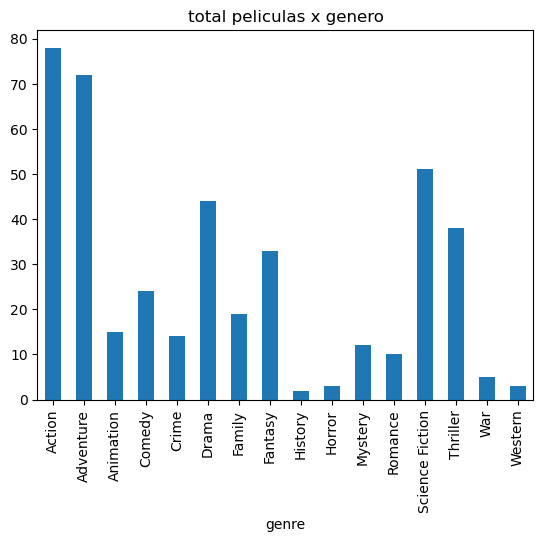

In [14]:
#Mostrem gràfic de barres per gènere
countAllFilmGen = analisis.groupby('genre')['id'].count()

countAllFilmGen.plot(kind = 'bar', title = 'total peliculas x genero' )

¿Quins son el tres gèneres amb millor valoració?

action, adventure y scince fiction.

In [15]:
# Mostrem gènres amb millor valoració
topGeneroValoracion = analisis.groupby(['genre'])['vote_average'].mean()
topGeneroValoracion.sort_values(ascending=False)

genre
History            7.950000
Western            7.566667
Drama              7.238636
Crime              7.100000
Mystery            7.075000
War                7.020000
Animation          6.986667
Family             6.921053
Thriller           6.836842
Comedy             6.808333
Science Fiction    6.762745
Adventure          6.718056
Action             6.665385
Romance            6.660000
Horror             6.466667
Fantasy            6.454545
Name: vote_average, dtype: float64



---



## Anàlisis econòmic

Observa el dataset financial i els seus estadìstics bàsics. ¿Quin és el pressupost i els ingressos promig?¿Sembla rentable fer una pel·lìcula?

In [16]:
#Observem dataset financials
print(financial['budget'].mean())

40654444.774233505


In [17]:
print(financial['revenue'].mean())

121242957.26138124


saben que el preu promig de las peliculas ronda els 40 milins y els ingresos promig son de 121 milins, si es rentable fer una pelicula.


Mostra la distribució (histograma) del pressupost de les pel·lícules. ¿La majoria de pel·lìcules son de baix o alt pressupost?

<AxesSubplot:>

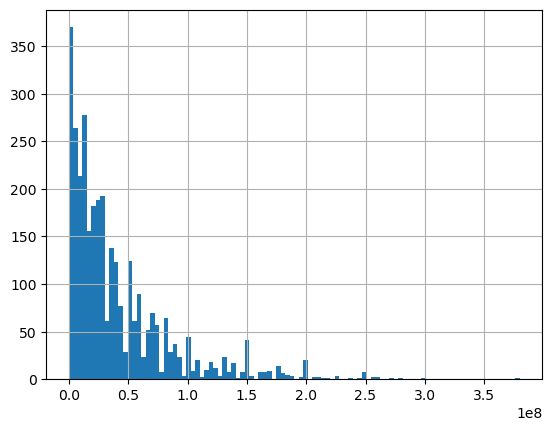

In [18]:
# Histograma
financial['budget'].hist(bins= 100)

La gran mayoria de les peliculas son de baix presupost.

Volem mostrar ( nom inclòs) les pel·lìcules les 5 pel·lícules mès profitosses i les 5 més deficitàries de la historia.

In [19]:
#Calculmen la columna profit
financial['profit'] = financial['revenue']-financial['budget']


#Merge amb movies
mergeMoviesFinancial = movies.merge(financial, on = 'id')


#Mostrem 5 millors i 5 pitjors
top5millorshistoria = mergeMoviesFinancial.sort_values(by = 'profit',ascending=False)[0:5]
display(top5millorshistoria)
top5Pichoshistoria = mergeMoviesFinancial.sort_values(by = 'profit',ascending=True)[0:5]
display(top5Pichoshistoria)

,id,title,popularity,release_date,year,budget,revenue,profit
20,19995,Avatar,150.437577,2009-12-10,2009.0,237000000,2.787965e+09,2.550965e+09
2473,597,Titanic,100.025899,1997-11-18,1997.0,200000000,1.845034e+09,1.645034e+09
1241,135397,Jurassic World,418.708552,2015-06-09,2015.0,150000000,1.513529e+09,1.363529e+09
977,168259,Furious 7,102.322217,2015-04-01,2015.0,190000000,1.506249e+09,1.316249e+09
414,24428,The Avengers,144.448633,2012-04-25,2012.0,220000000,1.519558e+09,1.299558e+09


,id,title,popularity,release_date,year,budget,revenue,profit
408,57201,The Lone Ranger,49.046956,2013-07-03,2013.0,255000000,89289910.0,-165710090.0
206,10733,The Alamo,10.660441,2004-04-07,2004.0,145000000,25819961.0,-119180039.0
1498,50321,Mars Needs Moms,12.362599,2011-03-09,2011.0,150000000,38992758.0,-111007242.0
3213,1911,The 13th Warrior,27.220157,1999-08-27,1999.0,160000000,61698899.0,-98301101.0
1805,11692,The Adventures of Pluto Nash,12.092241,2002-08-15,2002.0,100000000,7103973.0,-92896027.0


Ens tornem a centrar en les pel·lìcules que interessen a la productora ( > 2010 i amb alt grau de popularitat). Per fer una bona inversió no només ens interessa en el indicador 'profit' sino també el 'prop_profit' la proporció entre els beneficis i la quantitat que s'ha invertit en realizat la película. Quines son les 5 pel·lícules que porporcionalment han generat més benefici? Quines conclusions extreure comparant-les amb el llistat anterior?

In [28]:
# Fem un innerjoin amb el dataset filtrat anterior
mergeAllnotSequels = dataMoviesRatingGenre.merge(mergeMoviesFinancial)
display(mergeAllnotSequels)
#Crear nova columna
mergeAllnotSequels[prop_profit] = 

#Mostrar llistat



,id,title,popularity,release_date,year,vote_average,vote_count,movie_id,genre,budget,revenue,profit
0,257,Oliver Twist,20.415572,2005-09-23,2005.0,6.7,274.0,257,Crime,50000000,42093706.0,-7906294.0
1,257,Oliver Twist,20.415572,2005-09-23,2005.0,6.7,274.0,257,Drama,50000000,42093706.0,-7906294.0
2,257,Oliver Twist,20.415572,2005-09-23,2005.0,6.7,274.0,257,Family,50000000,42093706.0,-7906294.0
3,38365,Grown Ups,38.864027,2010-06-24,2010.0,6.0,1705.0,38365,Comedy,80000000,271430189.0,191430189.0
4,9672,Infamous,3.680896,2006-11-16,2006.0,6.4,60.0,9672,Drama,13000000,1151330.0,-11848670.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8554,12281,Mean Creek,8.519202,2004-01-15,2004.0,6.9,106.0,12281,Drama,500000,603943.0,103943.0
8555,3089,Red River,5.344815,1948-08-26,1948.0,7.3,82.0,3089,Western,3000000,9012000.0,6012000.0
8556,73873,Albert Nobbs,7.802245,2011-12-21,2011.0,6.2,132.0,73873,Drama,8000000,5634828.0,-2365172.0
8557,11622,Blast from the Past,8.737058,1999-02-12,1999.0,6.3,245.0,11622,Comedy,35000000,40263020.0,5263020.0


No tenim clar si és convenient realitzar una pel·lícula d'alt o baix pressupost, per aquesta raó anem a comparar si existeix una correlació entre el pressupost i el pro_profit guanyat. Podriem mostra una matriu de correlació, pero preferim extreu conclusions visuals a través d'un scatter plot. Et dona la sensació que si s'inverteixen més diner la proporció de benefici és més gran?

In [21]:
#Scatter plot
# Set the figure style and initalize a new figure
fig = plt.figure(figsize=(12,8))



# Create a title and axis labels


# Show the plot


<Figure size 1200x800 with 0 Axes>

En la mateixa gràfica anem incloure les valoracions de les pel·lìcules, aparentment imaginem que les pel·lìcules que han tingut bona acollida son les que mé beneficis han aportat. Veient la gràfica creada sembla certa aquesta afirmaciò?

In [22]:
#Hem de crear una llista de color per cada pel·lìcula
colors=[]

# Iteració sobre cada fila del dataset, si vote_average >= 7 --> verd / >=5 taronja /5 vermell


#Crea de nou la gràfica amb l'opció color

# Set the figure style and initalize a new figure
fig = plt.figure(figsize=(12,8))



# Create a title and axis labels


# Show the plot
plt.show()


    

<Figure size 1200x800 with 0 Axes>

Finalment per determinar quina tipus de pel·lìcula realitzarem visualitzarem els gèneres que ofereixen millor relació en quant a proporció de benefici. Mirant l'apartat anterior i aquest, quin seria els gèneres de la teva pel·lìcula? Fica imagina i proposa una temàtica. 

In [23]:
# Merge amb genre


#Mostrem gràfic de barres per gènere



In [24]:
# Mostrem gèneres i proposem temàtica

## 'Segundas partes no son buenas'

La nostra pel·lìcula ha tingut molt bona acollida tant que estem valorant la possibilitat de realitzar una segona part. Existeix la idea de que les seqüeles son sempre pitjors. Mostra la diferència promig entre les pel·lìcules i les seves seqüeles i les 5 pel·lìcules on les seves continuacions han millorat mès.

In [25]:
# mostrem dataset

# Elimina files que no tenen sequel


# comprova que no hi ha NA


# join amb movies per obtenir noms de original i de sequels



# simplifiquem per quedar-nos únicament amb id_original, titol_original, id_sequel, titol_sequel



In [26]:
# Merge per duplicat per obentenir les valoracions


# creem nova columna amb la diferenta valoracació sequel i original


#mostre mitja



In [27]:
# Mostra les 5 millor sequeles en comparació a la seva predecesora



---



## UPGRADE - CASTING


A partir del dataset actors, fes l'anàlisis que consideris adient per escollir els nostres actors/actrius